   # Noise prediction using Linear Regression

Import the required libraries. Pandas will be used for reading data file and various other operations on the dataframe. Numpy will be used for mathematical operations on the data. sklearn.metrics amath and random libraries will be used for various other operations.Matplotlib will be used for plotting the data.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import train_test_split

Import the data

In [45]:
dataset=pd.read_csv(r'C:\Users\Rishab\Assignment-2_Dataset\Datasets\Question-3\airfoil.csv',header=None)
dataset

,0,1,2,3,4,5
0,8000.0,4.0,0.2286,39.6,0.004738,113.129
1,6300.0,0.0,0.0508,55.5,0.000762,132.796
2,400.0,4.0,0.2286,55.5,0.004286,123.274
3,1250.0,15.4,0.0508,39.6,0.028259,126.743
4,800.0,7.3,0.2286,39.6,0.012348,126.299
...,...,...,...,...,...,...
1197,3150.0,5.4,0.1524,31.7,0.005255,118.291
1198,2500.0,19.7,0.0508,39.6,0.036484,116.184
1199,800.0,2.0,0.2286,55.5,0.003135,128.492
1200,3150.0,3.3,0.1016,71.3,0.002028,132.114


This function normailizes test data using the calculated train mean and train std.This is essential to ensure that we are transforming our test data according to the data we have built our model on.

In [46]:
def normalize_test(test_values,train_mean,train_std):
    for i in range(test_values.shape[1]):
        test_values[:,i]=test_values[:,i]-train_mean[i]
        test_values[:,i]=test_values[:,i]/train_std[i]
    return test_values

The follwing function is my own implementation of train test split provided by sklearn.

In [47]:
#train test split
def train_test_split(df,test_size):
    df_size=len(df)
    if isinstance(test_size,float):#if test size is passed as a proportion
        test_size=round(test_size*df_size)
    #pick random samples from the data for train test split
    indexes=df.index.tolist()
    test_indices=random.sample(population=indexes,k=test_size)
    #now putting the values of train and test data into the respective df's
    test_df=df.loc[test_indices]
    cropped_df=df.drop(test_indices)
    train_df=cropped_df
    return train_df,test_df

The following is a helper function which is used to normalize the training data.It basically takes the columns which we want to normalize and it calculates means and standard deviations of each of them and applies the same to each column.It is equivalent to standardscaler of sklearn.

In [48]:
def normalize(dataset):
    train_mean=[]
    train_std=[]
    for i in range(dataset.shape[1]):
        mean=np.mean(dataset[:,i])
        train_mean.append(mean)
        std=np.std(dataset[:,i])
        train_std.append(std)
        dataset[:,i]=(dataset[:,i]-mean)/std
    return dataset,train_mean,train_std

In [49]:
train_data,test_data=train_test_split(dataset,0.25)
train_data=np.array(train_data)
test_data=np.array(test_data)

In [50]:
train_values=train_data[:,:-1]
train_labels=train_data[:,-1]
test_values=test_data[:,:-1]
test_labels=test_data[:,-1]
test_labels2=test_labels
train_labels2=train_labels
train_values2=train_values
test_values2=test_values

In [51]:
train_values,train_mean,train_std=normalize(train_values)

In [52]:
test_values=normalize_test(test_values,train_mean,train_std)

In [53]:
print(train_values.shape,test_values.shape)

(902, 5) (300, 5)


In [54]:
def predict(values,weights,bias):
    return np.dot(values,weights)+bias

In [112]:
def multi_var_linear_regression_random(train_values,train_labels,alpha,num_iter,i):
    train_dimension=train_values.shape[1]
    num_samples=train_values.shape[0]
    ones=np.ones((train_values.shape[0],1))
    bias=0
    if(i==0):
        weights=np.array([100.23,95.12,55.6,109.11,110.54])
    elif(i==1):
        weights=np.array([210.5,220.6,230.7,195.5,200.122])
    elif(i==3):
        weights=np.random.rand(train_dimension)
    elif(i==2):
        weights=np.array([43.1,23.2,41.2,50.43,64])
    elif(i==4):
        weights=np.array([-2.3,-1.5,-0.9,-3.7,-4.1])
    print('random_weights : ')
    print(weights)
    weights,bias,cost=gradient_descent(weights,train_values,train_labels,alpha,bias,num_iter)
    return weights,bias,cost

In [55]:
def gradient_descent(weights,train_values,train_labels,alpha,bias,num_iter):
    num_samples=train_values.shape[0]
    dim=train_values.shape[1]
    cost=np.ones(num_iter)
    i=0
    #print(weights,bias)
    for i in range(num_iter):
            predict=np.dot(train_values,weights)+bias
            cost[i]=(1/(2*num_samples)*sum(np.square(predict-train_labels)))
            #print(cost[i])
            #print(train_values.shape)
            dw=1/(num_samples)*np.dot(train_values.T,(predict-train_labels))
            db=1/(num_samples)*np.sum(predict-train_labels)
            weights-=alpha*dw
            bias-=alpha*db
            i+=1
    return weights,bias,cost

In [56]:
def multi_var_linear_regression(train_values,train_labels,alpha,num_iter):
    train_dimension=train_values.shape[1]
    num_samples=train_values.shape[0]
    ones=np.ones((train_values.shape[0],1))
    bias=0
    weights=np.zeros(train_dimension)
    weights,bias,cost=gradient_descent(weights,train_values,train_labels,alpha,bias,num_iter)
    return weights,bias,cost

# change in cost(mean square error) with change in learning rate for fixed intial weights.

alpha :  0.0001
r2_score :  -5.599064836350409
mean square error is :  322.77892594410775
mean absolute error is :  17.264740625937957
alpha :  0.0002
r2_score :  0.39357261320336645
mean square error is :  29.662078707740633
mean absolute error is :  4.327571936238975
alpha :  0.0005
r2_score :  0.5449094540918655
mean square error is :  22.25976577868939
mean absolute error is :  3.7030500667123456
alpha :  0.001
r2_score :  0.5451288891115793
mean square error is :  22.24903259122507
mean absolute error is :  3.6979714304700853
alpha :  0.002
r2_score :  0.5450534584979931
mean square error is :  22.25272211588355
mean absolute error is :  3.6979185556270964
alpha :  0.05
r2_score :  0.5450505173324189
mean square error is :  22.25286597661058
mean absolute error is :  3.697917926092433
alpha :  0.01
r2_score :  0.5450505173324098
mean square error is :  22.25286597661103
mean absolute error is :  3.6979179260924577
alpha :  0.02
r2_score :  0.5450505173324156
mean square error is :

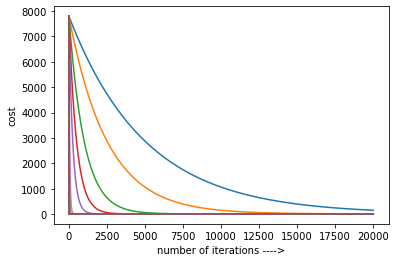

In [70]:
alpha_lst=[0.0001,0.0002,0.0005,0.001,0.002,0.05,0.01,0.02,0.05,0.1,0.2,0.5,0.6,0.7,0.8,0.9]
num_iter=20000
for alpha in alpha_lst: 
    theta,bias,cost=multi_var_linear_regression(train_values,train_labels,alpha,num_iter)
    n_iter=[x for x in range(num_iter)]
    plt.plot(n_iter,cost)
    plt.xlabel('number of iterations ---->')
    plt.ylabel('cost')
    prediction=[]
    for i in range(len(test_values)):
        prediction.append(predict(test_values[i],theta,bias))
    print("alpha : ",alpha)
    print('r2_score : ',r2_score(np.array(test_labels),np.array(prediction)))
    print("mean square error is : ",mean_squared_error(np.array(test_labels),np.array(prediction)))
    print("mean absolute error is : ",mean_absolute_error(np.array(test_labels),np.array(prediction)))

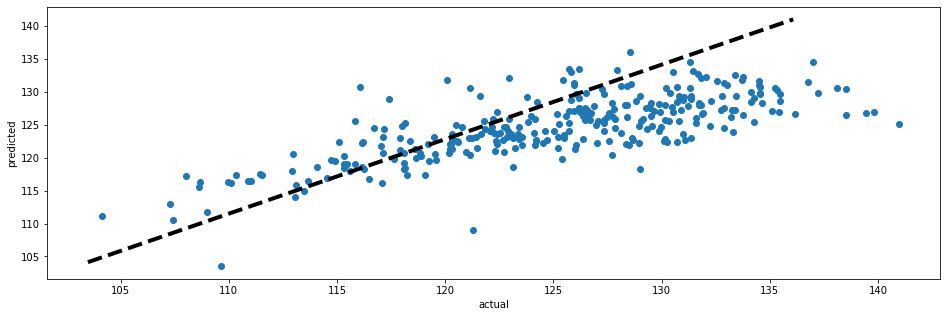

In [130]:
prediction2=np.array(prediction)
fig,ax=plt.subplots()
ax.scatter(test_labels,prediction)
ax.plot([prediction2.min(),prediction2.max()],[test_labels.min(),test_labels.max()],'k--',lw=4)
ax.set_xlabel('actual')
ax.set_ylabel('predicted')
plt.show()

# change in cost(mean square error) for different weights but fixed value of learning rate

random_weights : 
[100.23  95.12  55.6  109.11 110.54]
random_weights : 
[210.5   220.6   230.7   195.5   200.122]
random_weights : 
[43.1  23.2  41.2  50.43 64.  ]
random_weights : 
[0.3368997  0.7360843  0.52422172 0.76100324 0.0796534 ]
random_weights : 
[-2.3 -1.5 -0.9 -3.7 -4.1]


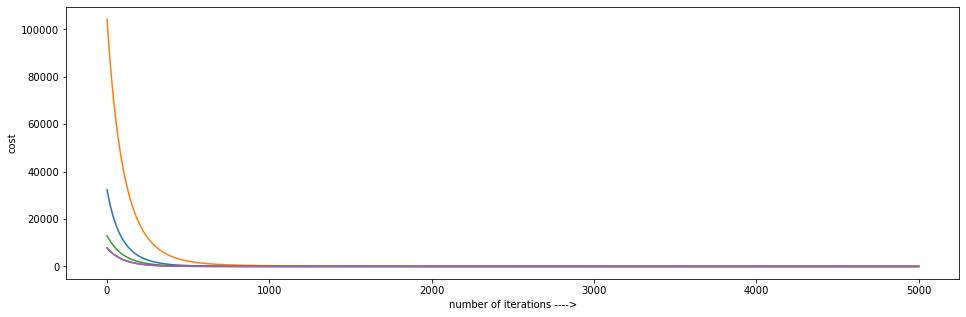

In [113]:
alpha_lst2=[0.005]
num_iter=5000
mse_lst2=[]
mae_lst2=[]
r2_lst2=[]
for i in range(5):
        theta,bias,cost=multi_var_linear_regression_random(train_values,train_labels,0.005,num_iter,i)
        n_iter=[x for x in range(num_iter)]
        plt.rcParams["figure.figsize"] = (16,5)
        plt.plot(n_iter,cost)
        plt.xlabel('number of iterations ---->')
        plt.ylabel('cost')
        prediction=[]
        for i in range(len(test_values)):
            prediction.append(predict(test_values[i],theta,bias))
        mse_lst2.append(mean_squared_error(np.array(test_labels),np.array(prediction)))
        mae_lst2.append(mean_absolute_error(np.array(test_labels),np.array(prediction)))
        r2_lst2.append(r2_score(np.array(test_labels),np.array(prediction)))

3. If you want to apply regression on some dataset but one of it’s features has missing
values under below given conditions, how will you approach the problem. (No need
of Code Experimentation)
(a) When 0-0.5% of values are missing of that feature
(b) When 8-10% of values are missing of that feature
(c) When 60-70% of values are missing of that feature


A)when 0-0.5% values are missing then i would fill the missing values with some statistical approach like mean,median,mode depending on the feature.

B) When 8-10% values are missing then i would replace it with mean of the data if continuous and mode if categorical

C) When greater than 50% values are missing,then we cant generalize the missing values and hence the better way will be to either get more data or drop that feature.